## Decision Tree Modeling on UFO Sightings ##

Modeling UFO Sightings Using a Decision Tree Regressor and Classifier. 

The existence of extraterrestrial life and UFOs is a highly contentious topic, and although there are datasets like this one out there, there is an infamous amount of inconsistency in these reports. As a result, we decided to explore certain variables and their relationships futurther. The linear and logistic models are better at examining simpler, more straightforward relationships. The decision tree is less sensitive to outliers and feature interactions are automatically captured. It does have a high risk of overfitting, but we can analyze accuracy scores at different leaf samples to see whether any significant relationship might be underlying.

Here we are using a decision tree to try and find correlations in different characteristics of UFO sightings. Specifically, we are looking beyond linear relationships to try and see if we can capture any sort of predictability in duration of a sighting. We also looked at the latitude of the UFO  to see if there was any sort of consistency in their locations along the Earth's bandwidth.

In [5]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data= pd.read_csv("https://raw.githubusercontent.com/avery32/group_project/refs/heads/main/ufo_clean_data.csv") #Loading in the clean data

In [7]:
data #Ensuring that this was complete

,datetime,city,country,shape,duration (seconds),date posted,latitude,longitude,month,year,month_num
0,1949-10-10 20:30:00,san marcos,US,cylinder,2700.0,2004-04-27,29.883056,-97.941111,1949-10,1949,10
1,1955-10-10 17:00:00,chester (uk/england),GB,circle,20.0,2008-01-21,53.200000,-2.916667,1955-10,1955,10
2,1956-10-10 21:00:00,edna,US,circle,20.0,2004-01-17,28.978333,-96.645833,1956-10,1956,10
3,1960-10-10 20:00:00,kaneohe,US,light,900.0,2004-01-22,21.418056,-157.803611,1960-10,1960,10
4,1961-10-10 19:00:00,bristol,US,sphere,300.0,2007-04-27,36.595000,-82.188889,1961-10,1961,10
...,...,...,...,...,...,...,...,...,...,...,...
59710,2013-09-09 21:15:00,nashville,US,light,600.0,2013-09-30,36.165833,-86.784444,2013-09,2013,9
59711,2013-09-09 22:00:00,boise,US,circle,1200.0,2013-09-30,43.613611,-116.202500,2013-09,2013,9
59712,2013-09-09 22:00:00,napa,US,other,1200.0,2013-09-30,38.297222,-122.284444,2013-09,2013,9
59713,2013-09-09 22:20:00,vienna,US,circle,5.0,2013-09-30,38.901111,-77.265556,2013-09,2013,9


In [8]:
from sklearn.model_selection import train_test_split #Importing train_test_split
from sklearn.tree import DecisionTreeRegressor #Importing necessary tools from Sci-Kit for decision tree and R^2 score
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

#### Predicting Duration of a UFO Sighting Based on Location, Shape, Month, and Year ####

Looking at duration now. Can we predict how long a UFO was seen for, or how long a UFO in a certain country will be witnessed for? When conducting EDA, we created a kernel density plot that showed that there might be some predictibility of log duration based on country.

During EDA, we saw that 1960 verus 2010 had different average durations. Perhaps the date has some sort of correlation with the duration of a sightings. Maybe certain years had shorter sightings than others. If this is consistent, we can build a predictive model around it and other explanatory variables.

In [12]:
data_oh2=pd.get_dummies(data, columns=['country','shape'], drop_first=False) #One-hot encoding country and shape in order to use as explanatory variables in our regression

In [13]:
data_oh2

,datetime,city,duration (seconds),date posted,latitude,longitude,month,year,month_num,country_AU,...,shape_disk,shape_fireball,shape_flash,shape_formation,shape_light,shape_other,shape_oval,shape_rectangle,shape_sphere,shape_triangle
0,1949-10-10 20:30:00,san marcos,2700.0,2004-04-27,29.883056,-97.941111,1949-10,1949,10,False,...,False,False,False,False,False,False,False,False,False,False
1,1955-10-10 17:00:00,chester (uk/england),20.0,2008-01-21,53.200000,-2.916667,1955-10,1955,10,False,...,False,False,False,False,False,False,False,False,False,False
2,1956-10-10 21:00:00,edna,20.0,2004-01-17,28.978333,-96.645833,1956-10,1956,10,False,...,False,False,False,False,False,False,False,False,False,False
3,1960-10-10 20:00:00,kaneohe,900.0,2004-01-22,21.418056,-157.803611,1960-10,1960,10,False,...,False,False,False,False,True,False,False,False,False,False
4,1961-10-10 19:00:00,bristol,300.0,2007-04-27,36.595000,-82.188889,1961-10,1961,10,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59710,2013-09-09 21:15:00,nashville,600.0,2013-09-30,36.165833,-86.784444,2013-09,2013,9,False,...,False,False,False,False,True,False,False,False,False,False
59711,2013-09-09 22:00:00,boise,1200.0,2013-09-30,43.613611,-116.202500,2013-09,2013,9,False,...,False,False,False,False,False,False,False,False,False,False
59712,2013-09-09 22:00:00,napa,1200.0,2013-09-30,38.297222,-122.284444,2013-09,2013,9,False,...,False,False,False,False,False,True,False,False,False,False
59713,2013-09-09 22:20:00,vienna,5.0,2013-09-30,38.901111,-77.265556,2013-09,2013,9,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
y = data_oh2['duration (seconds)'] #Defining y variable as Price
X = data_oh2.drop(['city','month','datetime','duration (seconds)', 'latitude','longitude ','date posted'], axis=1) #Defining x variables as everything but country and anything that could result in colliniearity!

In [15]:
print(y.describe()) #Checking the y distribution, to see if a transformation would normalize it and quiet outliers

count    5.971500e+04
mean     8.478103e+03
std      6.696763e+05
min      1.000000e-02
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      9.783600e+07
Name: duration (seconds), dtype: float64


In [16]:
y = np.log1p(y) #Log transforming duration 

In [17]:
print(y.describe()) #Checking that the distribution looks more normal

count    59715.000000
mean         4.965065
std          2.075538
min          0.009950
25%          3.433987
50%          5.198497
75%          6.398595
max         18.398803
Name: duration (seconds), dtype: float64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=96) #Train test splitting the data (test data is 20 percent of data)

In [19]:
print(X_train.shape, y_train.shape) #Checking the shapes of the data to make sure everything goes smoothly

(47772, 21) (47772,)


In [20]:
from sklearn.tree import DecisionTreeRegressor #Importing necessary tools from Sci-Kit for decision tree and R^2 score
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

In [21]:
for leaf in range(50, 75): #Iterating 25 times over the possible number of leaves in each ending group
    model = DecisionTreeRegressor(min_samples_leaf=leaf, max_depth=7, random_state=96)
    model.fit(X_train, y_train) #Fitting the model
    y_pred = model.predict(X_test) #Predicting y values
    score = r2_score(y_test, y_pred)
    print(f"min_samples_leaf = {leaf}, R Squared = {score:.4f}") #Printing the R^2 score for the model at each R^2

min_samples_leaf = 50, R Squared = 0.0286
min_samples_leaf = 51, R Squared = 0.0288
min_samples_leaf = 52, R Squared = 0.0290
min_samples_leaf = 53, R Squared = 0.0290
min_samples_leaf = 54, R Squared = 0.0290
min_samples_leaf = 55, R Squared = 0.0290
min_samples_leaf = 56, R Squared = 0.0290
min_samples_leaf = 57, R Squared = 0.0290
min_samples_leaf = 58, R Squared = 0.0290
min_samples_leaf = 59, R Squared = 0.0289
min_samples_leaf = 60, R Squared = 0.0288
min_samples_leaf = 61, R Squared = 0.0288
min_samples_leaf = 62, R Squared = 0.0289
min_samples_leaf = 63, R Squared = 0.0288
min_samples_leaf = 64, R Squared = 0.0290
min_samples_leaf = 65, R Squared = 0.0290
min_samples_leaf = 66, R Squared = 0.0290
min_samples_leaf = 67, R Squared = 0.0290
min_samples_leaf = 68, R Squared = 0.0290
min_samples_leaf = 69, R Squared = 0.0290
min_samples_leaf = 70, R Squared = 0.0289
min_samples_leaf = 71, R Squared = 0.0295
min_samples_leaf = 72, R Squared = 0.0298
min_samples_leaf = 73, R Squared =

In [22]:
from sklearn.model_selection import cross_val_score

# Assuming you have a RandomForestClassifier model and data X, y
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.03954227 0.03251082 0.02634016 0.01353349 0.03190297]
Mean cross-validation score: 0.028765940651913867


These R squared values are very low. I tried taking out year to see if it was hurting my model, but the model performed significantly worse. This aligns with what we witnessed in EDA. The highest R^2 is at 14 leaves. These percentages hang around 2-3%, which is too low. The predictive power remains too weak to suggest any strong patterns or reliability in the reported characteristics. 

According to the cross-validation, the model is struggling to find meaningful relationships and generalize the data.

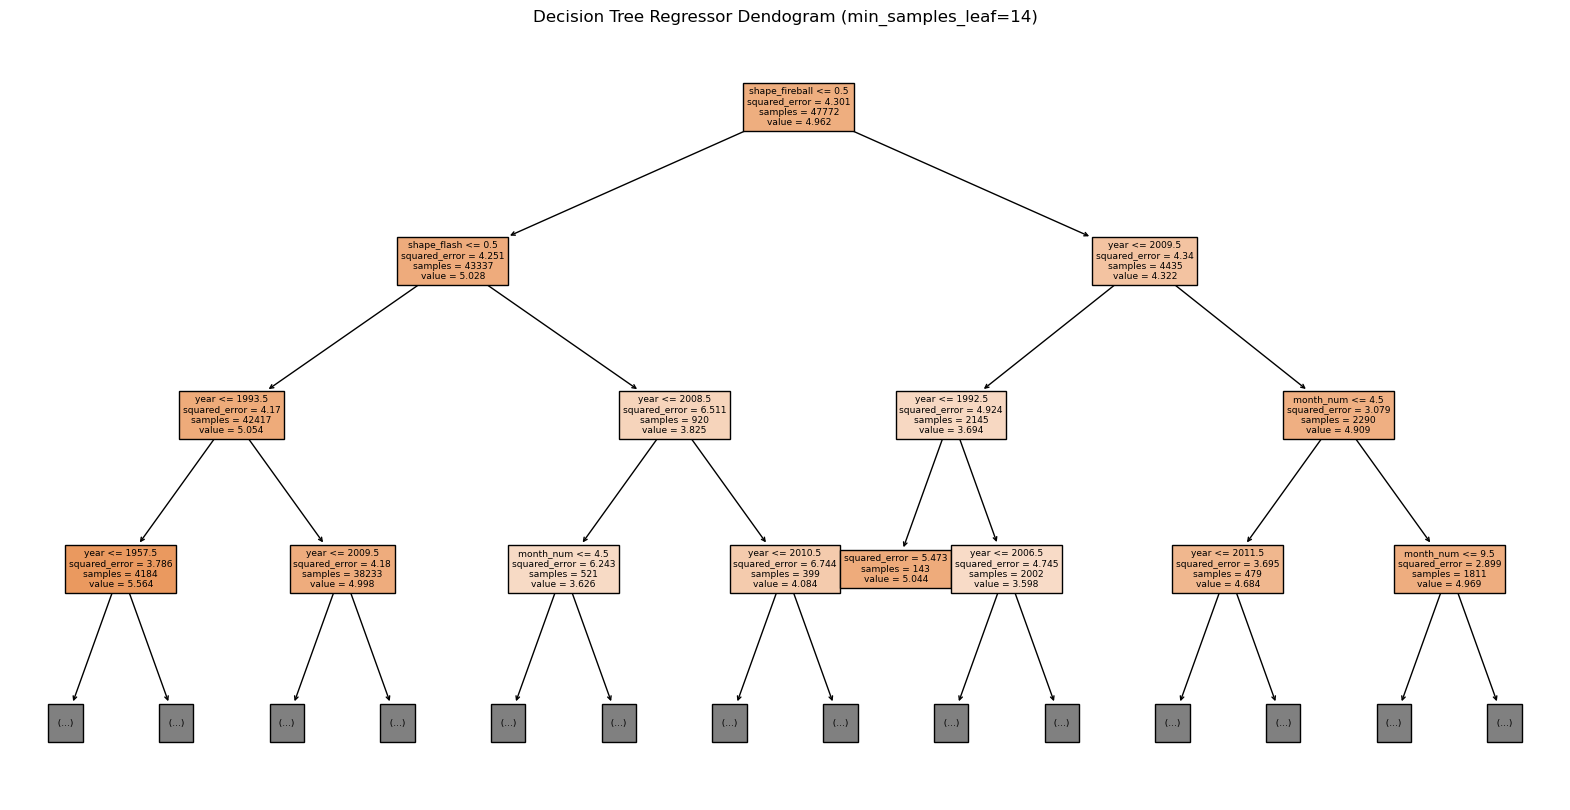

In [25]:
from sklearn.tree import plot_tree #importing tool necessary to plot the decision tree

plt.figure(figsize=(20,10)) #Establishing the figure size
plot_tree(model, feature_names=X.columns, filled=True, max_depth=3) #Plotting the dendogram
plt.title("Decision Tree Regressor Dendogram (min_samples_leaf=14)") #Adding a title
plt.show()

### Decision Tree Classification ###

Predicting UFO Shape in a Sighting Based on Latitude, Longitude, Month, and Year

In [28]:
 from sklearn.tree import DecisionTreeClassifier, plot_tree #Importing decision tree classifier

In [29]:
data

,datetime,city,country,shape,duration (seconds),date posted,latitude,longitude,month,year,month_num
0,1949-10-10 20:30:00,san marcos,US,cylinder,2700.0,2004-04-27,29.883056,-97.941111,1949-10,1949,10
1,1955-10-10 17:00:00,chester (uk/england),GB,circle,20.0,2008-01-21,53.200000,-2.916667,1955-10,1955,10
2,1956-10-10 21:00:00,edna,US,circle,20.0,2004-01-17,28.978333,-96.645833,1956-10,1956,10
3,1960-10-10 20:00:00,kaneohe,US,light,900.0,2004-01-22,21.418056,-157.803611,1960-10,1960,10
4,1961-10-10 19:00:00,bristol,US,sphere,300.0,2007-04-27,36.595000,-82.188889,1961-10,1961,10
...,...,...,...,...,...,...,...,...,...,...,...
59710,2013-09-09 21:15:00,nashville,US,light,600.0,2013-09-30,36.165833,-86.784444,2013-09,2013,9
59711,2013-09-09 22:00:00,boise,US,circle,1200.0,2013-09-30,43.613611,-116.202500,2013-09,2013,9
59712,2013-09-09 22:00:00,napa,US,other,1200.0,2013-09-30,38.297222,-122.284444,2013-09,2013,9
59713,2013-09-09 22:20:00,vienna,US,circle,5.0,2013-09-30,38.901111,-77.265556,2013-09,2013,9


In [30]:
data['shape'].value_counts()

shape
light        14628
triangle      7038
circle        6717
fireball      5526
other         4889
sphere        4732
disk          4477
oval          3285
formation     2171
cigar         1795
rectangle     1157
flash         1154
cylinder      1122
diamond       1024
Name: count, dtype: int64

In [31]:
#data['log_duration'] = np.log1p(data['duration (seconds)'])

In [32]:
data_oh=pd.get_dummies(data, columns=['country'], drop_first=False)

In [33]:
data_oh

,datetime,city,shape,duration (seconds),date posted,latitude,longitude,month,year,month_num,country_AU,country_CA,country_DE,country_GB,country_US
0,1949-10-10 20:30:00,san marcos,cylinder,2700.0,2004-04-27,29.883056,-97.941111,1949-10,1949,10,False,False,False,False,True
1,1955-10-10 17:00:00,chester (uk/england),circle,20.0,2008-01-21,53.200000,-2.916667,1955-10,1955,10,False,False,False,True,False
2,1956-10-10 21:00:00,edna,circle,20.0,2004-01-17,28.978333,-96.645833,1956-10,1956,10,False,False,False,False,True
3,1960-10-10 20:00:00,kaneohe,light,900.0,2004-01-22,21.418056,-157.803611,1960-10,1960,10,False,False,False,False,True
4,1961-10-10 19:00:00,bristol,sphere,300.0,2007-04-27,36.595000,-82.188889,1961-10,1961,10,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59710,2013-09-09 21:15:00,nashville,light,600.0,2013-09-30,36.165833,-86.784444,2013-09,2013,9,False,False,False,False,True
59711,2013-09-09 22:00:00,boise,circle,1200.0,2013-09-30,43.613611,-116.202500,2013-09,2013,9,False,False,False,False,True
59712,2013-09-09 22:00:00,napa,other,1200.0,2013-09-30,38.297222,-122.284444,2013-09,2013,9,False,False,False,False,True
59713,2013-09-09 22:20:00,vienna,circle,5.0,2013-09-30,38.901111,-77.265556,2013-09,2013,9,False,False,False,False,True


In [34]:
y = data_oh['shape'] #Defining y variable as Price
X = data_oh.drop(['shape','city','datetime','date posted','month','duration (seconds)','year'], axis=1) #Defining x variables as everything but country and anything that could result in colliniearity!

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96) 

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


for leaf in range(20,55):
    model_class = DecisionTreeClassifier(min_samples_leaf=leaf, max_depth=5, class_weight='balanced', random_state=96)
    model_class.fit(X_train, y_train)  # Fit the model with training data
    y_pred = model_class.predict(X_test)  # Predict on the test data
    score = accuracy_score(y_test, y_pred)
    print(f"min_samples_leaf = {leaf}, Accuracy = {score:.4f}")  # Print the accuracy score for each model

min_samples_leaf = 20, Accuracy = 0.0716
min_samples_leaf = 21, Accuracy = 0.0716
min_samples_leaf = 22, Accuracy = 0.0716
min_samples_leaf = 23, Accuracy = 0.0717
min_samples_leaf = 24, Accuracy = 0.0717
min_samples_leaf = 25, Accuracy = 0.0716
min_samples_leaf = 26, Accuracy = 0.0718
min_samples_leaf = 27, Accuracy = 0.0718
min_samples_leaf = 28, Accuracy = 0.0718
min_samples_leaf = 29, Accuracy = 0.0718
min_samples_leaf = 30, Accuracy = 0.0718
min_samples_leaf = 31, Accuracy = 0.0718
min_samples_leaf = 32, Accuracy = 0.0718
min_samples_leaf = 33, Accuracy = 0.0720
min_samples_leaf = 34, Accuracy = 0.0720
min_samples_leaf = 35, Accuracy = 0.0720
min_samples_leaf = 36, Accuracy = 0.0720
min_samples_leaf = 37, Accuracy = 0.0720
min_samples_leaf = 38, Accuracy = 0.0720
min_samples_leaf = 39, Accuracy = 0.0720
min_samples_leaf = 40, Accuracy = 0.0720
min_samples_leaf = 41, Accuracy = 0.0720
min_samples_leaf = 42, Accuracy = 0.0720
min_samples_leaf = 43, Accuracy = 0.0720
min_samples_leaf

Despite my attempt at transformations and model fitting, the accuracy hangs out at around 7% for all sample leaf numbers with little variation in this accuracy between leaf values. This model is doing a little better than predicting random values out of my shape class. Because it's only doing 3% better than random, and a decision tree is a highly sensitive model, this most likely means that the x variables are not very predictive of UFO sightings. There is no pattern that can be definitely generalized between these variables; this is especially difficult with shape classification because observants may have been under the impact of weather or different levels of vision. Some described the shape as a cigar, while others may have seen a disc. It also seems possible that the observations were just a random plane/cloud/object in the sky. There could be some collinearity between variables that we have not included in the data set that is ensuring that the decision tree classifier is doing a little better than random. Perhaps, like we saw in EDA, some countries contribute more to each shape observation. Germany was observed to have an oddly high contribution to diamond-shaped sightings. It's possible that observants saw the same object in the sky, but it wasn't a UFO. In general, because I tried to change the constraints to no avail, I think the model is generalizing, and it isn't finding meaninful relationships.

### Implementing a Random Forest (A Stronger Model) ###

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=25, # Number of trees
    bootstrap=True, #Enabling bootstrap in order to give the model different perspectives on the data
    max_depth=None,
    random_state=96    # For reproducibility
)

rf_model.fit(X_train, y_train)  # Same data you used for the single tree

RandomForestClassifier(n_estimators=25, random_state=96)

In [40]:
y_pred = model_class.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.07200870802980826

The forest should technically improve upon the decision tree because it's a deeper, stronger model that looks at data patterns from many angles. The lack of improvement in accuracy score is a major indicator that the variables have little predictive and explanatory power. There may be a lot of uncontrollable noise in the data because of how random and inconsistent the observations are. 